In [2]:
%matplotlib inline

# 1. Introducción

En este __Notebook__ pasare por los distintos pasos por los que se debe pasar para el procesamiento de una imagen. En nuestro caso lo que nos concierne es obtener los fitolitos de una imagen que ya nos ha proporcionado el CSIC. Para ello primero convertiremos nuestra imagen a escala de grises. Para más tarde poder aplicar distintos métodos mediante los que binarizar nuestra imagen. Una vez binarizada nuestra imagen, de manera ideal, podremos obtener los fitolitos.

# 2. Segmentación de los objetos y el fondo de la imagen

## 2.1. Convertiendo la imagen original en escala de grises

In [3]:
import skimage
from skimage.color.adapt_rgb import adapt_rgb
from skimage.color import rgb2gray
from skimage import filters


def as_gray(image_filter, image, *args, **kwargs):
    gray_image = rgb2gray(image)
    return image_filter(gray_image, *args, **kwargs)

@adapt_rgb(as_gray)
def sobel_gray(image):
    return filters.sobel(image)

D:\Program Files\Anaconda3\envs\opencv\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


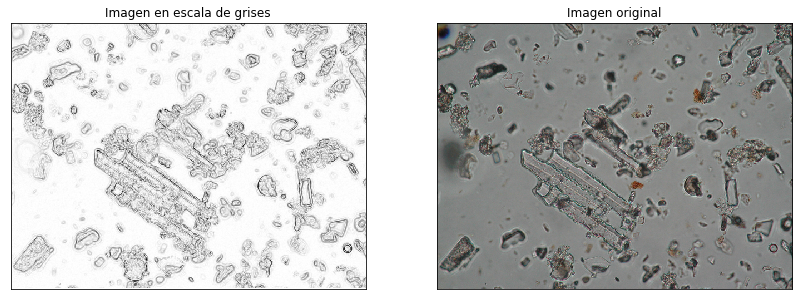

In [4]:
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt
from skimage import io

# Adaptar el path a nuestras necesidades
image_path = "D:\\Datos\\Dropbox\\UBU\\TFG\\Info\\2.TIF"
image = io.imread(image_path)

fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(121, adjustable='box-forced')
ax2 = fig.add_subplot(122, sharex=ax1, sharey=ax1,
                         adjustable='box-forced')

# Utilizamos sobel_gray para convertir la imagen original en escala de grises
grayscale_image = rescale_intensity(1 - sobel_gray(image))
# Y la mostramos a la izquierda
ax1.imshow(grayscale_image, cmap=plt.cm.gray)
ax1.set_xticks([]), ax1.set_yticks([])
ax1.set_title("Imagen en escala de grises")

# A la derecha mostramos la imagen original
ax2.imshow(image)
ax2.set_xticks([]), ax2.set_yticks([])
ax2.set_title("Imagen original")

# Guardamos la imagen
io.imsave('grayscale_image.jpg', grayscale_image)

# Nota: Rank filters

[Notebooks usando filtros](http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_rank_filters.html#contrast-enhancement)

## 2.2. Binarizado de la imagen

### 2.2.1. ¿Que algoritmo nos proporciona mejores resultados?

Scikit-learn nos proporciona un conjunto de algoritmos para binarizar la imagen. Por lo que vamos a probar los distintos métodos.

[Más información sobre algoritmos de binarizado en Scikit-learn](http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_thresholding.html#sphx-glr-auto-examples-xx-applications-plot-thresholding-py)


In [5]:
# Método auxiliar para mostrar algunas de las imagenes

def plot_threshold_and_original(image, binary,title):
    fig, axes = plt.subplots(ncols=2, figsize=(16, 6))
    ax = axes.ravel()

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Imagen en escala de grises')
    
    ax[1].imshow(binary, cmap=plt.cm.gray)
    ax[1].set_title(title)
    
    for a in ax:
        a.axis('off')
    
    plt.show()

### 2.2.2. Otsu thresholding

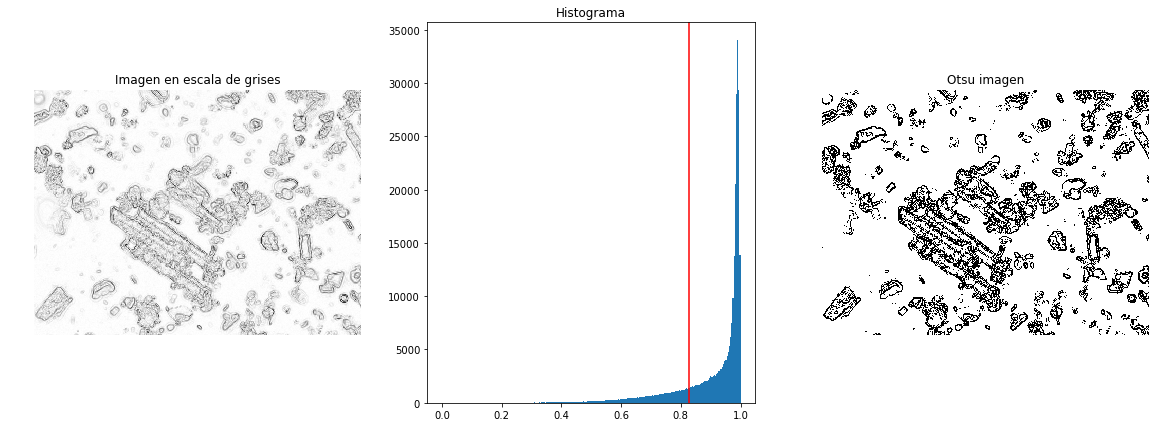

D:\Program Files\Anaconda3\envs\opencv\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from uint16 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [6]:
from skimage.filters import threshold_otsu
from skimage import img_as_uint


image = grayscale_image
thresh = threshold_otsu(image)
otsu_threshold_image = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(20, 7))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1, adjustable='box-forced')
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0], adjustable='box-forced')

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Imagen en escala de grises')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histograma')
ax[1].axvline(thresh, color='r')

ax[2].imshow(otsu_threshold_image, cmap=plt.cm.gray)
ax[2].set_title('Otsu imagen')
ax[2].axis('off')

plt.show()

# Guardamos la imagen
io.imsave('otsu_threshold_image.jpg', img_as_uint(otsu_threshold_image))

### 2.2.3. Li’s Minimum Cross Entropy método

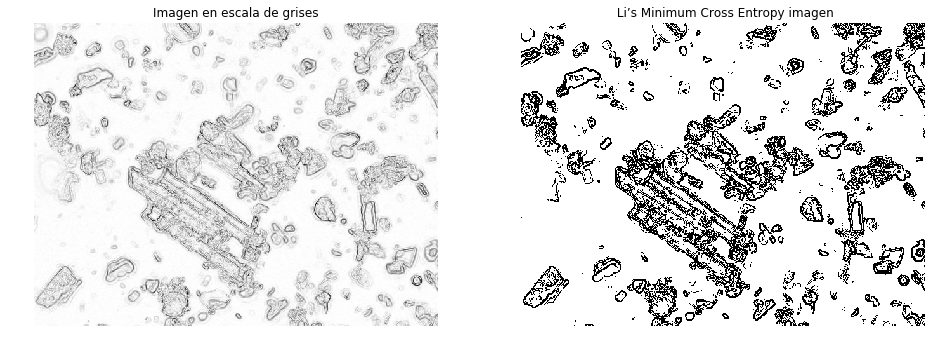

D:\Program Files\Anaconda3\envs\opencv\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from uint16 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [7]:
from skimage.filters import threshold_li


mean_threshold_image = image
block_size = 10
thresh = threshold_li(image)
li_thresholded_image = image > thresh

plot_threshold_and_original(image, li_thresholded_image, ' Li’s Minimum Cross Entropy imagen')

# Guardamos la imagen
io.imsave('li_thresholded_image.jpg', img_as_uint(li_thresholded_image))

### 2.2.4. ISODATA method 

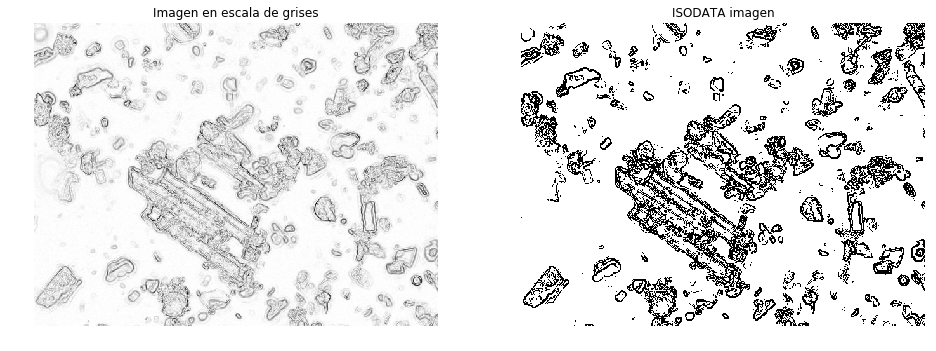

D:\Program Files\Anaconda3\envs\opencv\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from uint16 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [8]:
from skimage.filters import threshold_isodata


mean_threshold_image = image
block_size = 10
thresh = threshold_isodata(image)
isodata_thresholded_image = image > thresh

plot_threshold_and_original(image, isodata_thresholded_image, 'ISODATA imagen')

# Guardamos la imagen
io.imsave('isodata_thresholded_image.jpg', img_as_uint(isodata_thresholded_image))

Otros métodos:

- Threshold_triangle
- Threshold_minimum
- Threshold_local
- Threshold_mean

### 2.2.5.  Método adaptativo

No creo que el método adaptativo sea lo más apropiado para este caso. Principalmente, porque este método esta más enfocado para imagenes con una gran variación en el fondo, el cual no es este caso. Aun así veamos los resultados.

In [9]:
from skimage.filters import threshold_adaptive

mean_threshold_image = image
block_size = 10

# thresh1 = threshold_adaptive(image, 15, 'mean')

# adaptive_thresholded_image_1 = image > thresh1

# plot_threshold_and_original(image, adaptive_thresholded_image_1, 'Adaptive threshold, block size = 15')

In [10]:
# thresh2 = threshold_adaptive(image, 85, 'mean')

# adaptive_thresholded_image_2 = image > thresh2

# plot_threshold_and_original(image, adaptive_thresholded_image_2, 'Adaptive threshold, block size = 85')

In [11]:
# thresh3 = threshold_adaptive(image, 185, 'mean')

# adaptive_thresholded_image_3 = image > thresh3

# plot_threshold_and_original(image, adaptive_thresholded_image_3, 'Adaptive threshold, block size = 185')

In [12]:
# thresh4 = threshold_adaptive(image, 285, 'mean')

# adaptive_thresholded_image_4 = image > thresh4

# plot_threshold_and_original(image, adaptive_thresholded_image_4, 'Adaptive threshold, block size = 285')

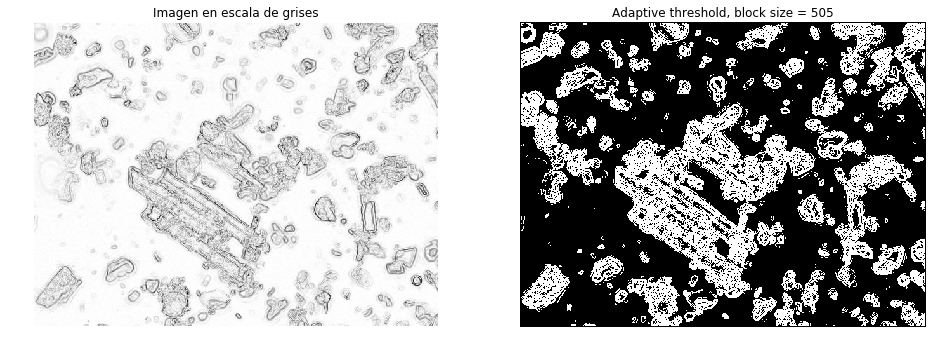

D:\Program Files\Anaconda3\envs\opencv\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from uint16 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [13]:
thresh5 = threshold_adaptive(image, 505, 'mean')

adaptive_thresholded_image_5 = image > thresh5

plot_threshold_and_original(image, adaptive_thresholded_image_5, 'Adaptive threshold, block size = 505')

# Guardamos la imagen
io.imsave('adaptive_thresholded_image_5.jpg', img_as_uint(adaptive_thresholded_image_5))


### 2.2.6.  Yen’s método

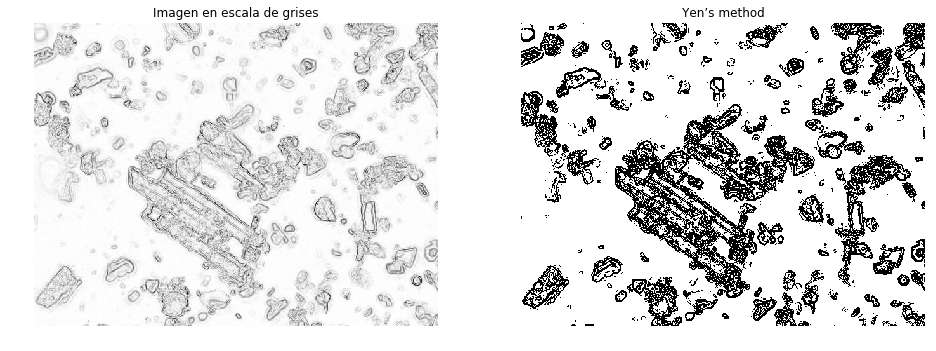

D:\Program Files\Anaconda3\envs\opencv\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from uint16 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [14]:
from skimage.filters import threshold_yen

mean_threshold_image = image
block_size = 300000
thresh = threshold_yen(image,block_size)
yen_image = image > thresh

plot_threshold_and_original(image, yen_image, 'Yen’s method')

# Guardamos la imagen
io.imsave('yen_image.jpg', img_as_uint(yen_image))

### 2.2.7. Basada en los bordes

D:\Program Files\Anaconda3\envs\opencv\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from uint16 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


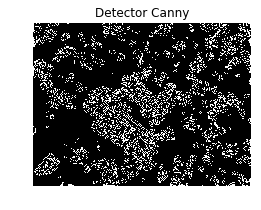

In [15]:
from skimage.feature import canny
from scipy import ndimage as ndi

edges = canny(grayscale_image)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(edges, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('Detector Canny')

# Guardamos la imagen
io.imsave('edge_based_image.jpg', img_as_uint(edges))

Después de detectar los bordes, vamos a rellenar los agujeros. Así intentaremos obtener los objetos rellenos, pero como vamos a observar no obtenemos nada de efectividad mediante este método. 

(-0.5, 639.5, 479.5, -0.5)

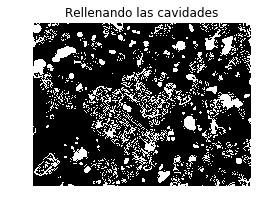

In [16]:
from scipy import ndimage as ndi

fill_holes = ndi.binary_fill_holes(edges)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(fill_holes, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('Rellenando las cavidades')
ax.axis('off')

### 2.2.8. Basada en las regiones

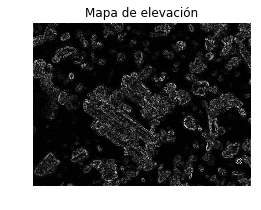

In [17]:
from skimage.filters import sobel

elevation_map = sobel(grayscale_image)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('Mapa de elevación')
ax.axis('off')
ax.set_adjustable('box-forced')

Como vamos a ver, en este caso, no somos capaces de encontrar las marcas de la parte de atras de la imagen. Por lo que nos veremos límitados en la segmentación de esta imagen.

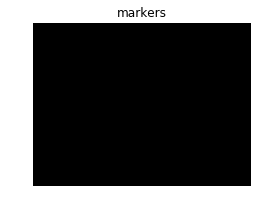

In [18]:
import numpy as np
markers = np.zeros_like(grayscale_image)
markers[grayscale_image < 30] = 1
markers[grayscale_image > 150] = 2

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.spectral, interpolation='nearest')
ax.set_title('markers')
ax.axis('off')
ax.set_adjustable('box-forced')

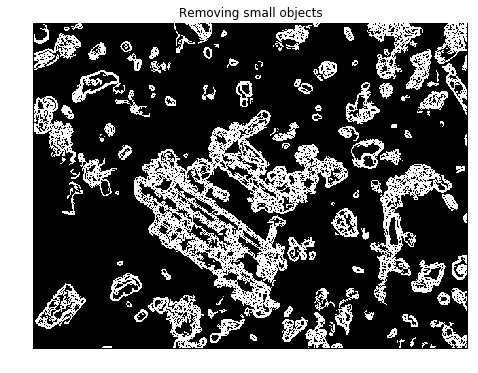

In [19]:
from skimage import morphology

inverted_yen_image = np.invert(yen_image)

yen_image_cleaned = morphology.remove_small_objects(inverted_yen_image, 21)

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(yen_image_cleaned, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('Removing small objects')

In [20]:
# segmentation = morphology.watershed(elevation_map, markers)

# fig, ax = plt.subplots(figsize=(4, 3))
# ax.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')
# ax.set_title('segmentation')
# ax.axis('off')
# ax.set_adjustable('box-forced')

Como vemos, este método no nos ha funcionado en absoluto.

## 3.Segmentación de la imagen (Reconocimiento de los filocitos)

La segmentación de imágenes es la tarea de etiquetar los píxeles de los objetos de interés en una imagen.

### 3.1.  Watershed segmentation

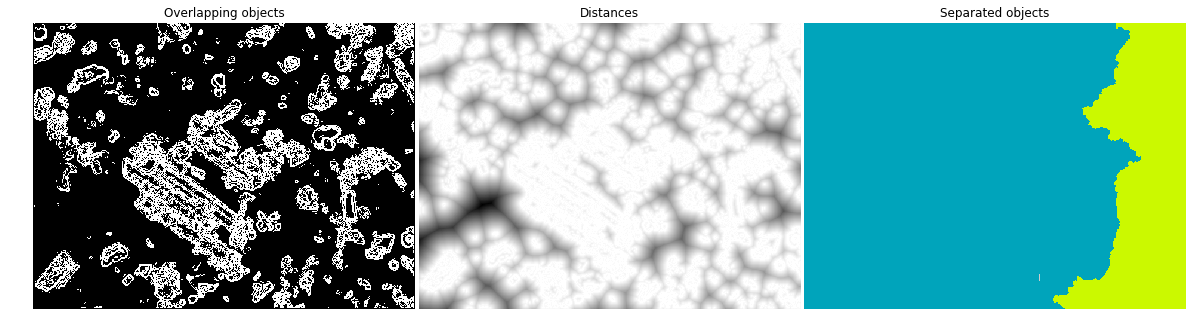

In [21]:
import numpy as np
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max

distance = ndi.distance_transform_edt(yen_image)

local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)

markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(16, 5.4), sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})
ax0, ax1, ax2 = axes

ax0.imshow(inverted_yen_image, cmap=plt.cm.gray, interpolation='nearest')
ax0.set_title('Overlapping objects')
ax1.imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax1.set_title('Distances')
ax2.imshow(labels, cmap=plt.cm.spectral, interpolation='nearest')
ax2.set_title('Separated objects')

for ax in axes:
    ax.axis('off')

fig.subplots_adjust(hspace=0.01, wspace=0.01, top=0.9, bottom=0, left=0,
                    right=1)
plt.show()

# Pruebas

Prueba con el borrado de objetos pequeños

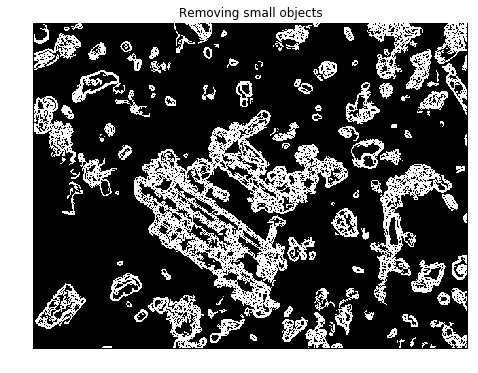

In [22]:
from skimage import morphology

inverted_yen_image = np.invert(yen_image)

yen_image_cleaned = morphology.remove_small_objects(inverted_yen_image, 21)

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(yen_image_cleaned, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('Removing small objects')


(-0.5, 639.5, 479.5, -0.5)

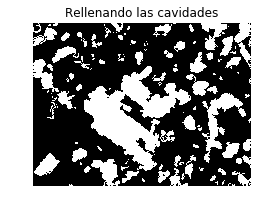

In [23]:
from scipy import ndimage as ndi

fill_holes = ndi.binary_fill_holes(yen_image_cleaned)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(fill_holes, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('Rellenando las cavidades')
ax.axis('off')

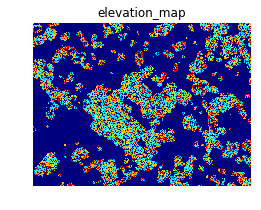

In [24]:
from skimage.filters import sobel

elevation_map = sobel(inverted_yen_image)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(elevation_map, cmap=plt.cm.jet, interpolation='nearest')
ax.axis('off')
ax.set_title('elevation_map')

### 3.2 Watershed con marcas

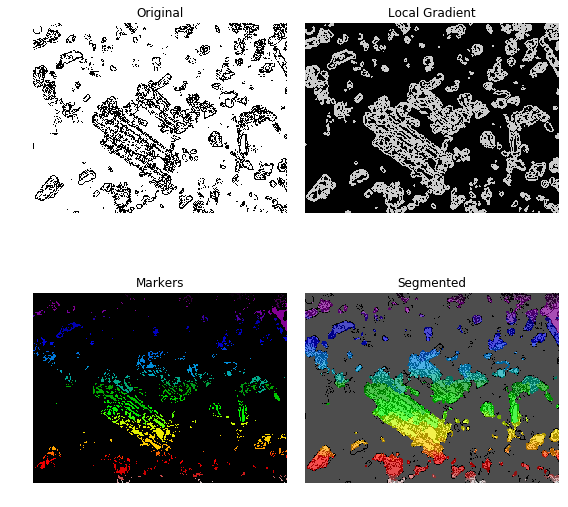

In [25]:
from skimage.morphology import disk
from skimage.filters import rank

image = isodata_thresholded_image
# denoise image
denoised = rank.median(image, disk(2))

# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(2)) < 40
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

# process the watershed
labels = watershed(gradient, markers)

# display results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})
axes = axes.ravel()
ax0, ax1, ax2, ax3 = axes

ax0.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax0.set_title("Original")
ax1.imshow(gradient, cmap=plt.cm.spectral, interpolation='nearest')
ax1.set_title("Local Gradient")
ax2.imshow(markers, cmap=plt.cm.spectral, interpolation='nearest')
ax2.set_title("Markers")
ax3.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax3.imshow(labels, cmap=plt.cm.spectral, interpolation='nearest', alpha=.7)
ax3.set_title("Segmented")

for ax in axes:
    ax.axis('off')

fig.tight_layout()
plt.show()


D:\Program Files\Anaconda3\envs\opencv\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


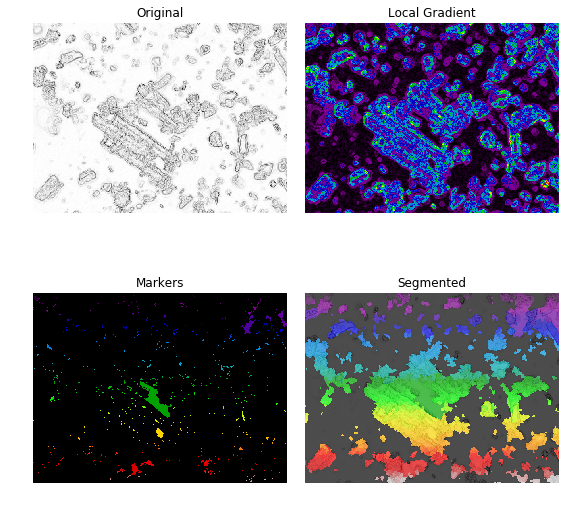

D:\Program Files\Anaconda3\envs\opencv\lib\site-packages\skimage\io\_io.py:132: UserWarning: markers_gimg.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
D:\Program Files\Anaconda3\envs\opencv\lib\site-packages\skimage\util\dtype.py:106: UserWarning: Possible sign loss when converting negative image of type int32 to positive image of type uint8.
  "%s to positive image of type %s." % (dtypeobj_in, dtypeobj))
D:\Program Files\Anaconda3\envs\opencv\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from int32 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


array([[ 0.14901961,  0.14901961,  0.14901961, ...,  0.2       ,
         0.1254902 ,  0.1254902 ],
       [ 0.14901961,  0.14901961,  0.14901961, ...,  0.2       ,
         0.2       ,  0.1254902 ],
       [ 0.14901961,  0.14901961,  0.14901961, ...,  0.2       ,
         0.2       ,  0.2       ],
       ..., 
       [ 0.00784314,  0.01176471,  0.01176471, ...,  0.21960784,
         0.2       ,  0.2       ],
       [ 0.00784314,  0.00784314,  0.01176471, ...,  0.2       ,
         0.2       ,  0.15686275],
       [ 0.00392157,  0.00784314,  0.00784314, ...,  0.16078431,
         0.15686275,  0.11764706]])

In [35]:
from skimage import exposure
image = grayscale_image
# denoise image
denoised = rank.median(image, disk(2))

# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(2)) < 10
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

# process the watershed
labels = watershed(gradient, markers)

# display results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})
axes = axes.ravel()
ax0, ax1, ax2, ax3 = axes

ax0.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax0.set_title("Original")
ax1.imshow(gradient, cmap=plt.cm.spectral, interpolation='nearest')
ax1.set_title("Local Gradient")
ax2.imshow(markers, cmap=plt.cm.spectral, interpolation='nearest')
ax2.set_title("Markers")
ax3.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax3.imshow(labels, cmap=plt.cm.spectral, interpolation='nearest', alpha=.7)
ax3.set_title("Segmented")

for ax in axes:
    ax.axis('off')

fig.tight_layout()
plt.show()

# Guardamos las imagenes
im = exposure.rescale_intensity(gradient, out_range='float')
im = img_as_uint(gradient)

from skimage import img_as_float
io.imsave('test_16bit.tif', img_as_float(gradient))
#o.imsave('local_gradient_gimg.jpg', gradient)
io.imsave('markers_gimg.jpg', markers)
io.imsave('segmented_gimg.jpg', image)

img_as_float(gradient)

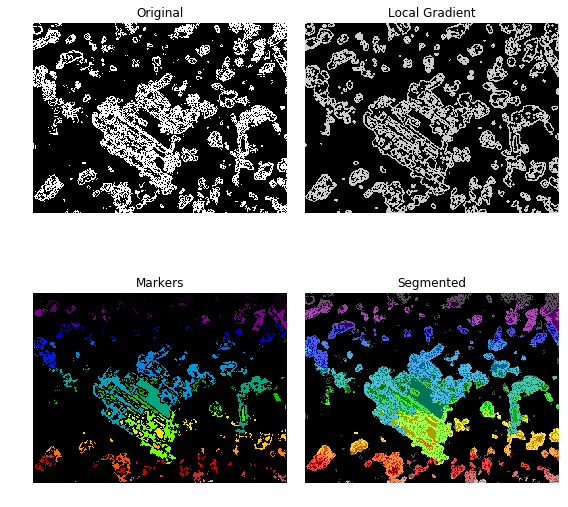

In [27]:
image = inverted_yen_image
# denoise image
denoised = rank.median(image, disk(2))

# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(2)) < 70
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

# process the watershed
labels = watershed(gradient, markers)

# display results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})
axes = axes.ravel()
ax0, ax1, ax2, ax3 = axes

ax0.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax0.set_title("Original")
ax1.imshow(gradient, cmap=plt.cm.spectral, interpolation='nearest')
ax1.set_title("Local Gradient")
ax2.imshow(markers, cmap=plt.cm.spectral, interpolation='nearest')
ax2.set_title("Markers")
ax3.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax3.imshow(labels, cmap=plt.cm.spectral, interpolation='nearest', alpha=.7)
ax3.set_title("Segmented")

for ax in axes:
    ax.axis('off')

fig.tight_layout()
plt.show()


Este código ha sido realizado partiendo de la galería de ejemplos provista por Scikit.